- By [lazarusA](https://lazarusa.github.io/Webpage/index.html)

In [1]:
using GLMakie, ColorSchemes, Colors

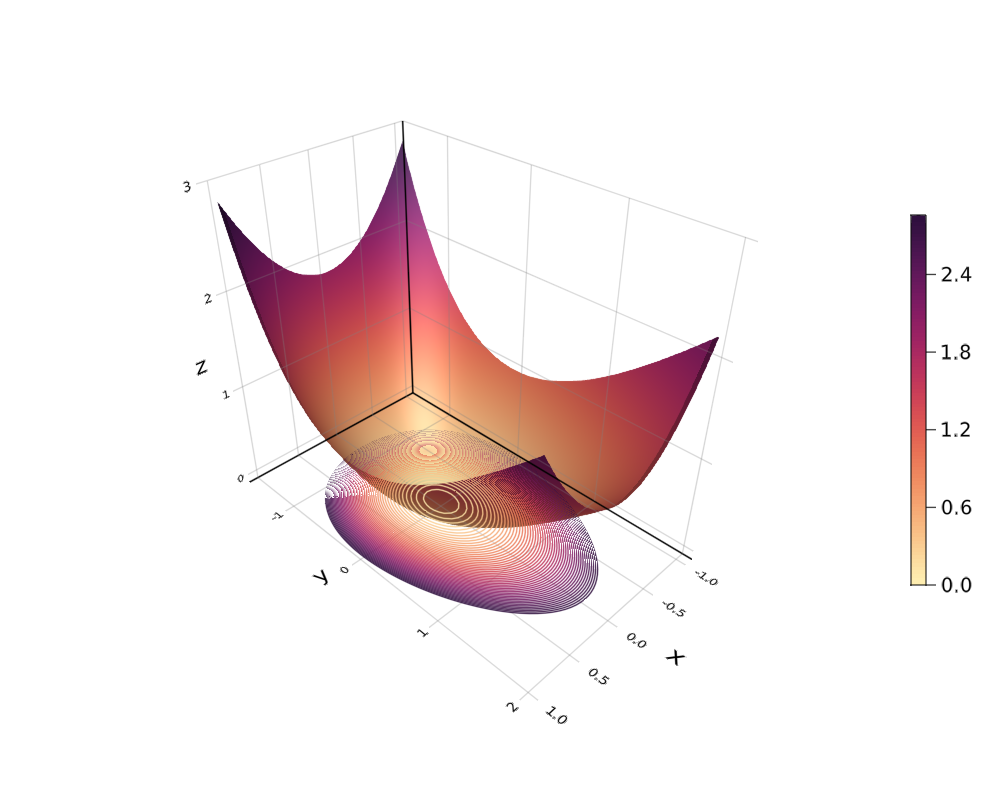

In [14]:
x = -1:0.05:1
y = -1.5:0.05:2
egg(x,y) = x^2 + y^2/(1.4 + y/5)^2
segg = [egg(x,y) for x in x, y in y]

fig = Figure(resolution = (1000, 800))
ax = LScene(fig, scenekw = (camera = cam3d!, show_axis = true))
surf = surface!(ax, x, y, segg, colormap = :matter, transparency = true)
xm, ym, zm = minimum(scene_limits(ax.scene))
clines = contour!(ax, x, y, segg, linewidth = 1.2, colormap = :matter, 
    levels = 0:0.02:1, transformation = (:xy, zm))

axis = ax.scene[OldAxis]

axis[:names, :axisnames] = ("x", "y", "z")
tstyle = axis[:names] #  get the nested attributes and work directly with them

tstyle[:textsize] = 10
tstyle[:gap] = 5
axis[:ticks][:textcolor] = :black
axis[:ticks][:textsize] = 5
cbar  = Colorbar(fig, surf, width = 15, height = Relative(2/4))
fig[1, 1] = ax
fig[1, 2] = cbar
save("./results/FigSurfCountour.png", fig, px_per_unit = 1)
fig